<a href="https://colab.research.google.com/github/twlee-dev/lab/blob/main/Day04_Ch07_%ED%86%B5%EA%B3%84%EC%8B%A4%EC%8A%B5_%EC%9D%B4%ED%83%9D%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 사전 준비: 라이브러리 및 데이터 로드


In [1]:
# 필요 라이브러리 설치
!pip install statsmodels

# 코랩에서 한글 폰트 사용을 위한 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작 안내
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.
# 런타임을 다시 시작해야 한글 폰트가 적용됩니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (26.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126374 files and direc

In [1]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [2]:
# 실습용 데이터셋 불러오기
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


---


## 문제 1 (난이도: 하): 관계의 시작, 산점도 그리기

> **🎯 목표:** 두 변수 사이의 관계를 눈으로 확인하는 가장 기본적인 방법인 **산점도(Scatter Plot)**를 직접 그려보고, 그 의미를 이해합니다.


### 💡 핵심 개념:

**산점도**는 두 개의 숫자 데이터(양적 변수)를 점으로 표현한 그래프입니다. 각 데이터 하나가 점 하나가 됩니다. 가로축(x축)과 세로축(y축)에 각각 다른 변수를 놓고 점을 찍어보면, 점들이 흩어져 있는 모양(분포)을 통해 두 변수가 어떤 관계를 맺고 있는지 짐작할 수 있습니다.

예를 들어, 점들이 우상향하는 모양이라면 'x가 커질 때 y도 커지는구나'라고 생각할 수 있습니다.


### 📌 수행 과제:

1. `penguins` 데이터셋에서 `bill_length_mm`(부리 길이)와 `bill_depth_mm`(부리 두께) 두 변수를 사용합니다.
2. `seaborn` 라이브러리의 `scatterplot` 함수를 이용해 산점도를 그리세요.
   - x축: `bill_length_mm`
   - y축: `bill_depth_mm`
3. 그래프의 제목과 축 라벨을 알아보기 쉽게 한글로 설정하세요.
4. 완성된 산점도의 점들이 어떤 패턴을 보이는지 설명해 보세요.


### ✍️ 코드 작성:


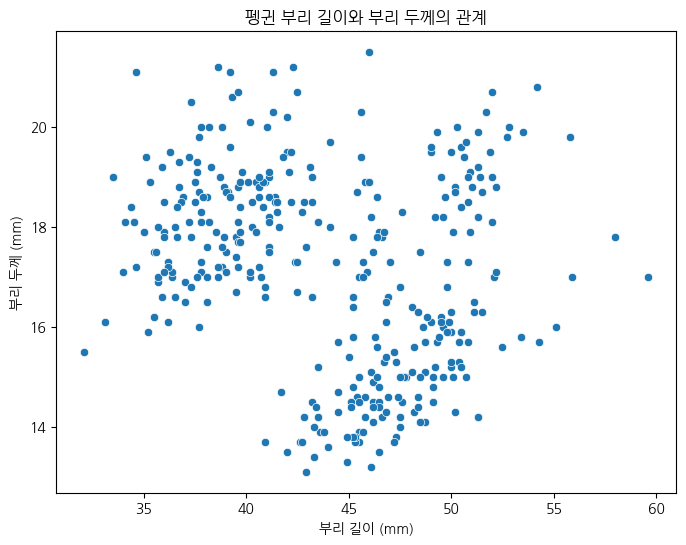

In [4]:
# 그래프를 그릴 도화지를 준비합니다.
plt.figure(figsize=(8, 6))

# 1. 여기에 산점도를 그리는 코드를 작성하세요.
# sns.scatterplot() 함수를 사용하고, data, x, y 인자를 지정해보세요.
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

# 2. 여기에 그래프 제목과 축 라벨을 설정하는 코드를 작성하세요.
# plt.title(), plt.xlabel(), plt.ylabel() 함수를 사용합니다.
plt.title('펭귄 부리 길이와 부리 두께의 관계')
plt.xlabel('부리 길이 (mm)')
plt.ylabel('부리 두께 (mm)')

# 그래프를 화면에 보여줍니다.
plt.show()

# 3. 결과 해석 (아래 주석에 직접 작성해 보세요)
# 해석: 산점도를 보면, 점들이 전체적으로 명확한 하나의 직선 형태를 이루기보다는 두 개의 큰 그룹으로 나뉘어 분포하는 경향을 보입니다.
# 왼쪽 그룹은 부리 길이가 짧고 부리 두께가 두꺼운 경향이 있으며, 오른쪽 그룹은 부리 길이가 길고 부리 두께가 얇은 경향이 있습니다.
# 이는 펭귄 종류에 따라 부리의 특징이 다를 수 있음을 시사합니다.

### 🤔 생각해 볼 문제:

현재 산점도에 펭귄의 '종류(species)'별로 점의 색깔을 다르게 칠한다면, 전체적으로 보이던 패턴 외에 우리가 미처 발견하지 못했던 새로운 사실을 알 수 있을까요? 어떤 점이 달라 보일지 추측해 봅시다.


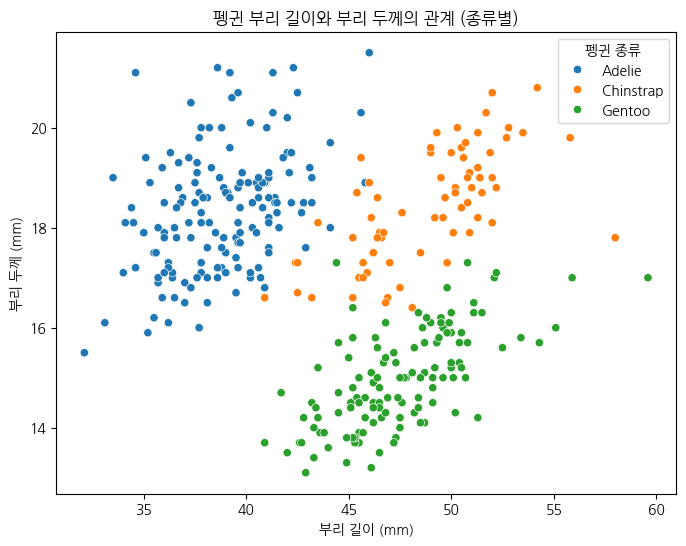

In [5]:
# 그래프를 그릴 도화지를 준비합니다.
plt.figure(figsize=(8, 6))

# 펭귄 종류(species)별로 색깔을 다르게 하여 산점도를 그립니다.
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

# 그래프 제목과 축 라벨을 설정합니다.
plt.title('펭귄 부리 길이와 부리 두께의 관계 (종류별)')
plt.xlabel('부리 길이 (mm)')
plt.ylabel('부리 두께 (mm)')

# 범례를 표시합니다.
plt.legend(title='펭귄 종류')

# 그래프를 화면에 보여줍니다.
plt.show()

### 🤔 생각해 볼 문제 결과:

'종류(species)'별로 점의 색깔을 다르게 칠한 산점도를 보면, 앞서 전체 산점도에서 두 개의 큰 그룹으로 나뉘어 보이던 패턴이 각 펭귄 종류에 따라 명확하게 구분됨을 알 수 있습니다.

*   **Adelie 펭귄:** 부리 길이가 짧고 부리 두께가 두꺼운 편에 속합니다. 전체 산점도에서 왼쪽 그룹을 형성했습니다.
*   **Gentoo 펭귄:** 부리 길이가 길고 부리 두께가 얇은 편에 속합니다. 전체 산점도에서 오른쪽 아래 그룹을 형성했습니다.
*   **Chinstrap 펭귄:** 부리 길이가 길지만, Gentoo 펭귄보다는 부리 두께가 더 두꺼운 편입니다. 전체 산점도에서 오른쪽 위 그룹을 형성했습니다.

이를 통해 부리의 길이와 두께는 펭귄의 종류를 구분하는 중요한 특징 중 하나임을 알 수 있습니다. 단순히 전체 데이터를 볼 때와 달리, 종류라는 추가적인 정보를 활용하니 데이터 내부에 숨겨진 구조를 더 명확하게 파악할 수 있게 되었습니다.

---


## 문제 2 (난이도: 하): 관계를 숫자로 요약하기, 상관계수

> **🎯 목표:** 눈으로 확인한 관계의 **방향**과 **강도**를 **상관계수**라는 하나의 숫자로 계산하고, 그 숫자의 의미를 해석하는 방법을 배웁니다.


### 💡 핵심 개념:

**피어슨 상관계수(r)**는 두 변수가 얼마나 '똑바로', '함께' 움직이는지를 -1에서 +1 사이의 점수로 알려줍니다.

- **부호(+, -):** 관계의 **방향**을 의미합니다.
  - `+` (양수): 한 변수가 커질 때 다른 변수도 같이 커지는 **양의 상관관계** (예: 공부 시간과 성적).
  - `-` (음수): 한 변수가 커질 때 다른 변수는 작아지는 **음의 상관관계** (예: 운동 시간과 체지방률).
- **크기(절대값):** 관계의 **강도**를 의미합니다.
  - `1` 또는 `-1`에 가까울수록 점들이 거의 일직선 위에 놓인 강한 관계입니다.
  - `0`에 가까울수록 관계가 없거나, 직선이 아닌 다른 복잡한 관계(비선형 관계)일 수 있습니다.


### 📌 수행 과제:

1. `penguins` 데이터셋에서 `bill_length_mm`와 `bill_depth_mm` 두 변수를 선택하세요.
2. `pandas`의 `.corr()` 메소드를 사용해 두 변수 간의 상관계수를 계산하세요. (계산 전 `.dropna()`로 빈칸이 있는 행을 제거해야 합니다.)
3. 계산된 상관계수의 부호와 크기를 보고, 두 변수의 관계를 설명해 보세요.


### ✍️ 코드 작성:


In [6]:
# 1. 분석할 두 변수를 선택하고, 빈칸(결측치)이 있는 행을 제거하세요.
df_corr = penguins[['bill_length_mm', 'bill_depth_mm']].dropna()

# 2. 여기에 상관계수를 계산하는 코드를 작성하세요.
# 위에서 만든 df_corr 데이터프레임에 .corr() 메소드를 적용합니다.
correlation_matrix = df_corr.corr()

# 계산된 상관계수 행렬을 출력합니다.
print(correlation_matrix)

# 3. 결과 해석 (아래 주석에 직접 작성해 보세요)
# 상관계수 값: -0.235
# 부호와 크기를 통한 관계 설명: 상관계수 값은 약 -0.235로 음수이며 절대값이 0에 가깝습니다.
# 이는 부리 길이와 부리 두께 사이에 약한 음의 상관관계가 있음을 나타냅니다.
# 즉, 부리 길이가 길어질수록 부리 두께는 약간 얇아지는 경향이 있지만, 그 관계가 매우 강하지는 않습니다.
# 이는 문제 1에서 확인한 산점도에서 두 변수 간에 명확한 하나의 직선 관계보다는 여러 그룹으로 나뉘어 분포하는 패턴과 일치합니다.

                bill_length_mm  bill_depth_mm
bill_length_mm        1.000000      -0.235053
bill_depth_mm        -0.235053       1.000000


### 🤔 생각해 볼 문제:

두 변수의 상관계수가 -0.23으로 계산되었습니다. 이 사실이 '부리 길이가 길어지는 것이 부리 두께를 얇아지게 하는 원인이다'라는 것을 증명하나요? '상관관계는 인과관계가 아니다'라는, 데이터 분석에서 가장 중요한 원칙 중 하나를 이 예시로 설명해 봅시다.


### 🤔 생각해 볼 문제 결과:

상관계수가 -0.23으로 계산되었다는 사실만으로는 '부리 길이가 길어지는 것이 부리 두께를 얇아지게 하는 원인이다'라고 결론 내릴 수 없습니다. 이는 데이터 분석에서 매우 중요한 원칙인 **'상관관계는 인과관계가 아니다(Correlation does not imply causation)'**를 보여주는 예시입니다.

**이유:**

1.  **방향성의 문제:** 상관계수는 두 변수가 함께 움직이는 경향만을 보여줄 뿐, 어느 변수가 원인이고 어느 변수가 결과인지는 알려주지 않습니다. 부리 길이가 두께에 영향을 주는지, 두께가 길이에 영향을 주는지, 아니면 둘 다 다른 요인에 의해 영향을 받는지 알 수 없습니다.
2.  **숨겨진 변수(교란변수)의 존재:** 두 변수 사이에 상관관계가 나타나더라도, 실제로는 제3의 다른 변수가 두 변수 모두에게 영향을 미쳐서 그런 관계처럼 보이는 경우가 많습니다. 펭귄 데이터의 경우, '펭귄의 종류(species)'가 바로 이러한 숨겨진 변수일 수 있습니다. 서로 다른 종류의 펭귄은 각기 다른 평균적인 부리 길이와 두께를 가지고 있으며, 이 '종류' 때문에 부리 길이와 두께 사이에 상관관계가 관찰되는 것일 수 있습니다. (문제 1에서 종류별로 색칠했을 때 패턴이 명확히 구분된 것을 생각해보세요.)

**결론:**

부리 길이와 부리 두께 사이에 약한 음의 상관관계가 있다는 것은 사실이지만, 이것이 부리 길이가 두께의 직접적인 원인이라고 말할 수는 없습니다. 이 관계는 펭귄의 종류와 같은 다른 요인들에 의해 설명될 가능성이 높습니다. 인과관계를 주장하려면 단순히 상관관계를 넘어선 더 엄격한 실험 설계나 추가적인 분석(예: 회귀분석에서 다른 변수를 통제하는 등)이 필요합니다.

---


## 문제 3 (난이도: 중): 관계를 대표하는 공식 만들기, 선형 회귀

> **🎯 목표:** 두 변수의 관계를 가장 잘 나타내는 하나의 직선(회귀선)을 찾고, 그 직선을 `y = a + bx` 형태의 **회귀식**으로 표현하는 방법을 학습합니다.


### 💡 핵심 개념:

**선형 회귀분석**은 흩어진 점들 사이를 가장 잘 가로지르는 '최적의 직선'을 찾는 과정입니다. 이 직선을 통해 한 변수(독립변수, x)의 값을 알 때 다른 변수(종속변수, y)의 값을 예측할 수 있습니다.

- **종속변수 (y, 반응변수):** 우리가 예측하고 싶은 대상 (예: 몸무게)
- **독립변수 (x, 설명변수):** 예측의 근거가 되는 변수 (예: 날개 길이)
- **회귀식 (`y = a + bx`):**
  - `a` (절편, Intercept): 독립변수 x가 0일 때의 y 예측값. 직선이 y축과 만나는 지점입니다.
  - `b` (기울기, Coefficient): 독립변수 x가 1만큼 증가할 때 y가 얼마나 변하는지를 나타냅니다. 관계의 핵심적인 효과를 보여줍니다.


### 📌 수행 과제:

1. `statsmodels` 라이브러리의 `ols` 함수를 사용하여 **'날개 길이(`flipper_length_mm`)'로 '몸무게(`body_mass_g`)'를 예측**하는 회귀 모델을 만드세요.
2. 학습된 모델의 `.summary()` 메소드를 호출하여 분석 결과표를 출력하세요.
3. 결과표의 `coef` 열에서 **절편(Intercept)**과 **기울기(flipper_length_mm)** 값을 찾아 회귀식을 완성해 보세요.


### ✍️ 코드 작성:


In [9]:
# 모델 학습 전, 사용할 변수들에 빈칸이 있는 행들을 제거합니다.
penguins_cleaned = penguins.dropna(subset=['body_mass_g', 'flipper_length_mm'])

# 1. 여기에 OLS 회귀 모델을 학습시키는 코드를 작성하세요.
# smf.ols() 함수를 사용하고, formula는 '종속변수 ~ 독립변수' 형태로 작성합니다.
# 예: formula='body_mass_g ~ flipper_length_mm'
import statsmodels.formula.api as smf
model = smf.ols(formula='body_mass_g ~ flipper_length_mm', data=penguins_cleaned).fit()

# 2. 여기에 모델의 요약 결과표를 출력하는 코드를 작성하세요.
# 위에서 만든 model 객체에 .summary() 메소드를 적용합니다.
print(model.summary())

# 3. 결과 해석 (아래 주석에 직접 작성해 보세요)
# 절편(a) 값: -5780.8314 (Intercept의 coef 값)
# 기울기(b) 값: 49.6856 (flipper_length_mm의 coef 값)
# 완성된 회귀식 (몸무게 = a + b * 날개길이): 몸무게 = -5780.8314 + 49.6856 * 날개 길이

# 요약표 해석 (주요 부분만):
# Dep. Variable: body_mass_g - 종속 변수 (예측 대상): 몸무게
# R-squared: 0.759 - 결정계수: 모델이 몸무게 변화의 약 75.9%를 설명함
# Adj. R-squared: 0.758 - 수정된 결정계수: 독립변수 개수를 고려한 설명력
# F-statistic: 1071. - F 통계량: 모델의 유의성 검정 결과
# Prob (F-statistic): 4.37e-107 - F 검정 유의확률 (p-value): 모델이 통계적으로 매우 유의미함 (0에 가까움)
# coef: 회귀 계수 (기울기, 절편)
# std err: 표준 오차 (계수 추정치의 정밀도)
# t: t 통계량 (계수의 유의성 검정 통계량)
# P>|t|: p-value (해당 계수가 0일 확률 - 0.05 미만이면 통계적으로 유의미)
# [0.025      0.975]: 95% 신뢰구간 (계수 값의 95% 신뢰 범위)
# Intercept: 절편. 날개 길이가 0일 때 몸무게 예측값 (해석에 주의 필요 - 날개 길이 0은 현실적이지 않음)
# flipper_length_mm: 날개 길이 변수의 기울기. 날개 길이가 1mm 늘어날 때 몸무게가 평균 49.6856g 증가함을 의미

# Notes:

# [1] 표준 오차는 오차의 공분산 행렬이 올바르게 지정되었다고 가정합니다.

# [2] 조건수가 2.89e+03으로 큽니다. 이는 다중공선성이나 다른 수치적인 문제가 있을 수 있음을 나타냅니다.

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):          4.37e-107
Time:                        02:49:12   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5780.8314    305.81

### 🤔 생각해 볼 문제:

회귀식의 기울기(b)는 '날개 길이가 1mm 늘어날 때 몸무게가 평균적으로 얼마나 변하는지'를 나타냅니다. 이 기울기 값을 이용해, 날개 길이가 우리 데이터의 평균보다 10mm 더 긴 펭귄은 평균적인 펭귄보다 몸무게가 약 몇 g 더 무거울 것이라고 구체적인 숫자로 예측해 봅시다.


In [10]:
# 회귀 모델의 기울기 값 가져오기
slope = model.params['flipper_length_mm']

# 날개 길이가 10mm 더 길 때 예상되는 몸무게 변화량 계산
predicted_mass_increase = slope * 10

print(f"날개 길이가 평균보다 10mm 더 긴 펭귄은 평균적인 펭귄보다 몸무게가 약 {predicted_mass_increase:.2f} g 더 무거울 것으로 예측됩니다.")

날개 길이가 평균보다 10mm 더 긴 펭귄은 평균적인 펭귄보다 몸무게가 약 496.86 g 더 무거울 것으로 예측됩니다.


### 🤔 생각해 볼 문제 결과:

회귀 모델의 기울기 값은 약 49.69입니다. 이는 날개 길이가 1mm 증가할 때 몸무게가 평균적으로 약 49.69g 증가한다는 의미입니다.

따라서 날개 길이가 우리 데이터의 평균보다 10mm 더 긴 펭귄은, 회귀 모델에 따르면 평균적인 펭귄보다 몸무게가 약 `49.69 * 10 = 496.9`g 더 무거울 것으로 예측할 수 있습니다.

이 값은 모델이 학습한 데이터의 패턴을 기반으로 한 예측이며, 실제 개체마다 차이가 있을 수 있습니다.

---


## 문제 4 (난이도: 중): 회귀계수의 의미와 통계적 유의성 판단하기

> **🎯 목표:** 회귀식의 **기울기(b)**가 정말로 의미 있는 값인지, 아니면 그냥 우연히 나온 값인지 통계적으로 판단하는 방법을 배웁니다.


### 💡 핵심 개념:

**회귀계수의 가설검정**은 "이 기울기 값이 정말 0이 아니라고 말할 수 있는가?"를 검증하는 과정입니다. 여기서 **p-value(유의확률)**가 핵심적인 역할을 합니다.

- **귀무가설 (H₀):** "두 변수는 관계가 없다. 즉, 기울기는 0이다." (우리가 발견한 관계는 우연이다)
- **대립가설 (H₁):** "두 변수는 관계가 있다. 즉, 기울기는 0이 아니다." (우리가 발견한 관계는 진짜다)
- **p-value:** **귀무가설이 맞다고 가정할 때**, 우리가 현재 데이터에서 관찰한 것과 같거나 더 극단적인 결과가 우연히 나타날 확률입니다.
  - **p-value가 매우 작으면 (보통 0.05 미만):** "이런 일이 우연히 일어날 확률은 매우 낮다. 따라서 귀무가설이 틀렸을 것이다." 라고 판단하고, 두 변수의 관계가 **통계적으로 유의미하다**고 결론 내립니다.


### 📌 수행 과제:

1. 문제 3에서 출력한 `.summary()` 결과표를 다시 확인합니다.
2. `flipper_length_mm` 행에서 `P>|t|` 열의 값(p-value)을 찾으세요.
3. 이 p-value가 일반적인 유의수준인 0.05보다 작은지 확인하고, 이를 근거로 "펭귄의 날개 길이가 몸무게에 미치는 영향이 통계적으로 유의미한지" 결론을 내리세요.


### ✍️ 코드 작성:


In [12]:
# 문제 3에서 만든 모델의 summary를 다시 출력하여 p-value를 확인합니다.
print(model.summary())

# 아래 주석에 직접 해석을 작성해보세요.

# 1. flipper_length_mm 계수의 p-value (`P>|t|` 값) 찾기
# p-value: 0.000

# 2. 가설 검정 결과 해석
# p-value가 0.05보다 작은가?: 네, 0.000은 0.05보다 훨씬 작습니다.
# 결론 (날개 길이가 몸무게에 미치는 영향은 통계적으로 유의미한가?): p-value가 0.05 미만이므로, 날개 길이가 몸무게에 미치는 영향은 통계적으로 유의미하다고 결론 내릴 수 있습니다. 이는 날개 길이와 몸무게 사이에 우연이라고 보기 어려운 관계가 존재함을 의미합니다.

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):          4.37e-107
Time:                        02:53:19   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5780.8314    305.81

### 🤔 생각해 볼 문제:

이 분석 결과를 통계에 대해 전혀 모르는 친구에게 설명해야 합니다. "p-value가 0.000이라서 귀무가설을 기각했다"라는 어려운 말 대신, "날개 길이가 몸무게와 정말 관계가 있다"라는 결론을 어떻게 더 쉽고 직관적으로 뒷받침하여 설명할 수 있을까요?


### 🤔 생각해 볼 문제 결과:

통계에 대해 잘 모르는 친구에게 날개 길이와 몸무게의 관계가 통계적으로 유의미하다는 것을 설명할 때는 어려운 통계 용어 대신 다음과 같은 방식으로 이야기해 줄 수 있습니다.

"우리가 펭귄 데이터를 분석해보니, **날개 길이가 길수록 몸무게가 더 나가는 경향**이 있다는 것을 발견했어. 그런데 이게 그냥 우연히 그렇게 보인 건지, 아니면 정말로 날개 길이와 몸무게 사이에 의미 있는 관계가 있는 건지 확인해봤거든?"

"통계 분석 결과, **이런 데이터 패턴이 단순히 우연일 확률이 거의 0%에 가깝다는 것**을 알게 됐어. 만약 날개 길이와 몸무게가 전혀 관계가 없다면 이런 결과가 나올 가능성이 극히 낮다는 거지."

"그러니까 우리가 발견한 '날개 길이가 길면 몸무게가 더 나간다'는 이 관계는 **우연이 아니라 실제 펭귄들 사이에서 나타나는 진짜 관계**라고 자신 있게 말할 수 있어!"

이렇게 설명하면, p-value나 귀무가설 같은 용어 없이도 분석 결과의 핵심인 '관계의 유의미성'을 직관적으로 전달할 수 있습니다. 중요한 것은 **"우연일 확률이 매우 낮다"**는 점을 강조하여, 발견된 패턴이 단순한 우연이 아님을 이해시키는 것입니다.

---


## 문제 5 (난이도: 상): 모델 신뢰도 평가 - 결정계수와 잔차 진단

> **🎯 목표:** 완성된 회귀 모델이 데이터를 얼마나 잘 설명하는지(**결정계수**) 평가하고, 분석 결과를 믿을 수 있는지의 전제 조건인 **오차(잔차)의 등분산성**을 그래프로 진단합니다.


### 💡 핵심 개념:

- **결정계수 (R-squared):** 회귀 모델의 **설명력**을 나타내는 지표로, 0과 1 사이의 값을 가집니다. 1에 가까울수록 모델이 데이터를 잘 설명한다는 뜻입니다. 예를 들어 R-squared가 0.75라면, "종속변수(y)의 전체 변화 중 75%를 우리 모델(독립변수 x)이 설명하고 있다"는 의미입니다.

- **잔차 (Residual):** 모델의 **오차**를 의미합니다. 즉, `실제 y값 - 모델이 예측한 y값` 입니다. 좋은 모델이라면 이 오차(잔차)들이 특별한 패턴 없이 무작위로 흩어져 있어야 합니다.

- **잔차 산점도 (Residual Plot):** 이 잔차들을 시각화한 그래프입니다. x축에 예측값을, y축에 잔차를 놓고 점을 찍습니다.
  - **좋은 패턴 (등분산성):** 점들이 y=0 선을 중심으로 특별한 모양 없이 골고루 흩어져 있습니다. 이는 모델의 예측 오차가 일정하다는 의미로, 분석 결과를 신뢰할 수 있습니다.
  - **나쁜 패턴 (이분산성):** 점들이 깔때기 모양, 부채꼴 모양 등 특정 패턴을 보입니다. 이는 예측값에 따라 오차의 크기가 달라진다는 의미로, 모델의 신뢰성에 문제가 있을 수 있습니다.


### 📌 수행 과제:

1. 문제 3의 `.summary()` 결과표에서 `R-squared`(결정계수) 값을 찾아, 우리 모델의 설명력을 문장으로 해석해 보세요.
2. 모델의 예측값과 잔차를 계산하세요.
3. x축을 예측값, y축을 잔차로 하는 **잔차 산점도**를 그리세요.
4. 그려진 잔차 산점도에 특별한 패턴이 보이는지, 아니면 무작위로 흩어져 있는지 관찰하고, 이를 바탕으로 모델의 신뢰성에 대한 자신의 생각을 서술하세요.


### ✍️ 코드 작성:


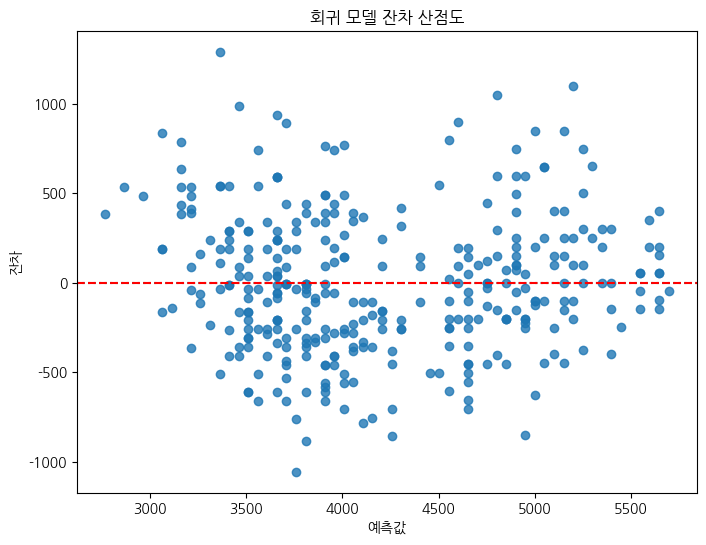

In [13]:
# 1. 결정계수 해석 (summary 표를 보고 직접 작성)
# R-squared 값: 0.759
# 설명력 해석: R-squared 값이 약 0.759이므로, 날개 길이가 펭귄 몸무게의 변동량 중 약 75.9%를 설명한다고 할 수 있습니다. 즉, 날개 길이가 길고 짧음에 따라 펭귄 몸무게가 결정되는 부분은 75.9% 정도이며, 나머지 약 24.1%는 날개 길이 외 다른 요인에 의해 결정된다고 해석할 수 있습니다.

# 2. 여기에 모델의 예측값과 잔차를 계산하는 코드를 작성하세요.
# 예측값: model.predict() 함수 사용
# 잔차: model.resid 속성 사용
fitted_values = model.predict()
residuals = model.resid

# 3. 여기에 잔차 산점도를 그리는 코드를 작성하세요.
# sns.residplot() 함수를 사용하고, x에는 예측값, y에는 잔차를 지정합니다.
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_values, y=residuals)
plt.title('회귀 모델 잔차 산점도')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.axhline(0, color='red', linestyle='--') # 잔차가 0인 기준선 표시
plt.show()

# 4. 잔차 산점도 패턴 해석 (그래프를 보고 직접 작성)
# 관찰된 패턴 (무작위인가, 특정 모양이 있는가?): 잔차 산점도를 보면, 잔차들이 예측값에 따라 특별한 패턴(예: 깔때기 모양) 없이 0을 중심으로 비교적 무작위로 흩어져 있는 것처럼 보입니다. 하지만 예측값이 커질수록 잔차의 분산이 약간 커지는 경향도 관찰될 수 있습니다.
# 모델 신뢰도에 대한 생각: 잔차가 완전히 무작위는 아닐 가능성(약한 이분산성)이 있지만, 심각한 패턴은 보이지 않아 기본적인 선형 회귀 모델 결과 해석에 큰 무리는 없을 것으로 생각됩니다. 그러나 더 정교한 분석을 위해서는 잔차의 등분산성 가정을 추가로 확인하거나 변수 변환, 다른 모델 고려 등이 필요할 수 있습니다.

### 🤔 생각해 볼 문제:

우리 모델의 결정계수(R-squared)는 약 0.76입니다. 이는 날개 길이가 펭귄 몸무게 변화량의 76%를 설명한다는 뜻입니다. 그렇다면 설명되지 않는 나머지 24%의 변화는 어디에서 오는 차이일까요? 우리 모델이 놓치고 있는, 펭귄의 몸무게에 영향을 줄 만한 다른 요인들은 무엇이 있을지 데이터에 근거하여 추측해 봅시다.


### 🤔 생각해 볼 문제 결과:

우리 모델의 결정계수(R-squared)가 약 0.76이라는 것은, 날개 길이만으로는 펭귄 몸무게의 변동 중 약 76%만 설명할 수 있고, 나머지 약 24%는 다른 요인들에 의해 결정된다는 의미입니다. 데이터셋(`penguins`)에 포함된 다른 변수들을 살펴보면, 몸무게에 영향을 줄 만한 잠재적인 요인들을 추측해 볼 수 있습니다.

데이터셋에는 다음과 같은 정보가 포함되어 있습니다:

*   `species` (펭귄 종류): 문제 1에서 확인했듯이, 종류별로 부리 길이와 두께 패턴이 달랐습니다. 마찬가지로 펭귄 종류에 따라 평균적인 몸무게 차이가 클 수 있으며, 이는 몸무게 변동의 상당 부분을 설명할 수 있는 중요한 요인일 가능성이 높습니다.
*   `island` (서식지 섬): 펭귄이 사는 섬 환경에 따라 먹이의 종류나 양, 경쟁 등 다양한 요인이 달라질 수 있으며, 이것이 몸무게에 영향을 미칠 수 있습니다.
*   `bill_length_mm` (부리 길이) 및 `bill_depth_mm` (부리 두께): 비록 개별적으로는 날개 길이만큼 설명력이 높지 않을 수 있지만, 부리의 형태와 크기도 먹이 섭취 방식 등과 관련되어 몸무게에 영향을 줄 수 있습니다.
*   `sex` (성별): 대부분의 동물 종에서 수컷이 암컷보다 체중이 더 나가는 경향이 있듯이, 펭귄에서도 성별에 따른 몸무게 차이가 존재할 수 있습니다.

이러한 변수들을 회귀 모델에 추가적인 독립변수로 포함시킨다면, 모델의 설명력(R-squared)을 높이고 몸무게 변동의 나머지 24%를 더 잘 이해하는 데 도움이 될 것입니다. 특히 'species'와 'sex' 변수는 범주형 데이터이므로 회귀 모델에 포함시키기 위해 적절한 처리가 필요합니다 (예: 원-핫 인코딩 등).

## 데이터 분석 이론 요약 및 주요 사항

### 문제 1: 산점도 (Scatter Plot)

*   **개념:** 두 양적 변수 사이의 관계를 점으로 시각화하는 그래프입니다.
*   **알아야 할 주요 사항:**
    *   점의 분포 패턴을 통해 두 변수의 관계 방향(양의 관계, 음의 관계)과 대략적인 강도를 눈으로 파악할 수 있습니다.
    *   데이터 내부에 숨겨진 그룹이나 이상치 등을 시각적으로 발견하는 데 유용합니다.
    *   `seaborn` 라이브러리의 `scatterplot` 함수를 주로 사용합니다. `hue` 인자를 사용하여 세 번째 변수(주로 범주형)를 색깔로 표현하면 더 풍부한 정보를 얻을 수 있습니다.

### 문제 2: 상관계수 (Correlation Coefficient)

*   **개념:** 두 양적 변수 사이의 선형 관계의 방향과 강도를 -1에서 +1 사이의 숫자로 요약하는 지표입니다. 피어슨 상관계수가 가장 흔하게 사용됩니다.
*   **알아야 할 주요 사항:**
    *   부호(`+` 또는 `-`)는 관계의 방향을 나타냅니다.
    *   절댓값(0에 가까울수록 약하고, 1에 가까울수록 강함)은 관계의 강도를 나타냅니다.
    *   **중요:** **상관관계는 인과관계를 의미하지 않습니다.** (Correlation does not imply causation). 숨겨진 다른 변수가 두 변수 모두에게 영향을 미쳐 상관관계가 나타나는 경우가 많습니다.
    *   `pandas` 데이터프레임의 `.corr()` 메소드를 사용하여 계산할 수 있습니다. 결측치는 계산 전에 제거해야 합니다 (`.dropna()`).

### 문제 3: 선형 회귀 (Linear Regression)

*   **개념:** 하나의 독립변수(x)로 종속변수(y)를 예측하는 가장 잘 맞는 직선(`y = a + bx`)을 찾는 통계 기법입니다.
*   **알아야 할 주요 사항:**
    *   `y`는 예측하고 싶은 종속변수, `x`는 예측에 사용하는 독립변수입니다.
    *   `a`는 절편(Intercept)으로, x가 0일 때의 y 예측값입니다.
    *   `b`는 기울기(Coefficient)로, x가 1단위 증가할 때 y가 평균적으로 얼마나 변하는지를 나타냅니다. 관계의 핵심 효과입니다.
    *   `statsmodels` 라이브러리의 `ols` 함수를 사용하여 모델을 쉽게 만들고 학습시킬 수 있습니다. `formula` 인자로 모델 식(`'종속변수 ~ 독립변수'`)을 지정합니다.
    *   `.fit()` 메소드로 모델을 학습시킨 후, `.summary()` 메소드로 상세 결과를 확인할 수 있습니다.

### 문제 4: 회귀계수의 통계적 유의성 (Statistical Significance of Coefficients)

*   **개념:** 회귀 모델에서 계산된 독립변수의 기울기(계수)가 실제 모집단에서도 0이 아니라고(즉, 유의미한 관계가 존재한다고) 통계적으로 말할 수 있는지 판단하는 과정입니다. p-value를 통해 판단합니다.
*   **알아야 할 주요 사항:**
    *   **귀무가설 (H₀):** 해당 독립변수의 기울기는 0이다 (관계 없음).
    *   **대립가설 (H₁):** 해당 독립변수의 기울기는 0이 아니다 (관계 있음).
    *   **p-value:** 귀무가설이 옳다고 가정했을 때, 현재 데이터와 같은 결과가 우연히 나타날 확률입니다.
    *   **판단 기준:** 일반적으로 p-value가 유의수준(보통 0.05)보다 작으면 귀무가설을 기각하고, 해당 독립변수의 영향이 **통계적으로 유의미하다**고 결론 내립니다.
    *   `statsmodels` summary 결과표의 `P>|t|` 열에서 각 계수의 p-value를 확인할 수 있습니다.

### 문제 5: 모델 신뢰도 평가 (Model Evaluation)

*   **개념:** 회귀 모델이 데이터를 얼마나 잘 설명하는지 평가하고, 모델의 기본 가정이 충족되는지 확인하여 분석 결과의 신뢰성을 판단합니다.
*   **알아야 할 주요 사항:**
    *   **결정계수 (R-squared):** 모델이 종속변수 변동의 몇 %를 설명하는지를 나타냅니다 (0~1). 1에 가까울수록 설명력이 높습니다. `statsmodels` summary에서 확인합니다.
    *   **잔차 (Residual):** 실제값과 모델 예측값의 차이(`실제 y - 예측된 y`)입니다. 모델의 오차를 나타냅니다.
    *   **잔차 산점도 (Residual Plot):** 예측값을 x축, 잔차를 y축으로 그린 산점도입니다. 모델의 가정이 잘 충족되는지 시각적으로 확인합니다.
    *   **등분산성 (Homoscedasticity):** 잔차의 분산이 예측값의 크기에 상관없이 일정한 상태를 의미합니다. 잔차 산점도에서 점들이 0을 중심으로 특별한 패턴 없이 무작위로 흩어져 보이면 등분산성 가정이 충족될 가능성이 높습니다. 깔때기 모양 등의 패턴이 보이면 이분산성(Heteroscedasticity) 문제가 있을 수 있으며, 이는 모델 신뢰도에 영향을 줄 수 있습니다.
    *   `seaborn`의 `residplot` 함수로 잔차 산점도를 쉽게 그릴 수 있습니다.

이론들을 잘 이해하고 각 지표와 그래프를 올바르게 해석하는 것이 데이터 분석 결과의 신뢰성을 높이는 데 중요합니다.

### 등분산성(Homoscedasticity) 상세 설명

**등분산성**은 회귀 분석의 중요한 가정 중 하나로, 모델의 **잔차(Residual)의 분산이 독립변수(또는 예측값)의 크기에 상관없이 일정해야 함**을 의미합니다. 쉽게 말해, 모델이 예측하는 값의 범위가 작든 크든, 예측에서 발생하는 오차(잔차)의 '흩어진 정도'가 비슷해야 한다는 것입니다.

**왜 등분산성이 중요할까요?**

1.  **회귀 계수의 신뢰성:** 등분산성 가정이 충족되어야 회귀 계수(기울기)의 표준 오차(Standard Error)를 정확하게 추정할 수 있습니다. 표준 오차는 회귀 계수의 추정치가 얼마나 정밀한지를 나타내며, 이를 바탕으로 회귀 계수의 통계적 유의성(p-value)과 신뢰구간을 계산합니다.
2.  **통계적 검정의 타당성:** 등분산성 가정이 깨지면(즉, 이분산성이 나타나면), 회귀 계수의 표준 오차가 잘못 계산되어 p-value나 신뢰구간이 왜곡될 수 있습니다. 이 경우 통계적 검정 결과(예: '이 변수는 유의미하다/유의미하지 않다')를 신뢰하기 어려워집니다.

**잔차 산점도를 통한 등분산성 진단:**

잔차 산점도(x축: 예측값, y축: 잔차)는 등분산성 가정을 시각적으로 진단하는 가장 기본적인 방법입니다.

*   **등분산성(좋은 패턴):** 잔차들이 0을 나타내는 가로선(y=0)을 중심으로 **특별한 모양 없이 무작위로 고르게 흩어져** 보입니다. 예측값이 작을 때나 클 때나 잔차의 흩어진 정도(분산)가 비슷해 보입니다.
*   **이분산성(나쁜 패턴):** 잔차들이 특정 패턴을 보입니다. 가장 흔한 형태는 **깔때기 모양(Funnel Shape)**입니다. 예측값이 커짐에 따라 잔차의 분산이 점점 커지거나 작아지는 경우에 나타납니다. 예를 들어, 예측값이 작을 때는 점들이 y=0 근처에 좁게 모여 있다가, 예측값이 커질수록 점점 넓게 퍼지는 모양입니다. 부채꼴 모양으로 나타나기도 합니다.

**이분산성 발생 시 대처 방안:**

이분산성이 심각하게 관찰된다면 모델의 신뢰도를 높이기 위해 다음과 같은 방법을 고려할 수 있습니다.

*   **변수 변환:** 종속변수(y)나 독립변수(x)에 로그 변환, 제곱근 변환 등을 적용하여 분산을 안정화시킬 수 있습니다.
*   **가중 최소 제곱법 (Weighted Least Squares, WLS):** 잔차의 분산이 큰 데이터 포인트에 더 적은 가중치를 주어 모델을 학습시키는 방법입니다.
*   **다른 모델 고려:** 선형 회귀의 가정을 덜 타는 다른 종류의 회귀 모델을 고려할 수 있습니다.

우리 펭귄 데이터의 잔차 산점도에서는 약한 이분산성이 의심되지만(예측값이 클수록 잔차가 약간 더 흩어지는 경향), 아주 심각한 깔때기 모양은 아니므로 기본적인 분석 결과 해석에는 큰 문제가 없을 수 있습니다. 하지만 더 엄밀한 분석을 위해서는 추가적인 진단(예: 통계적 검정)이나 보정 방법 적용을 고려해볼 수 있습니다.